# **Salary Prediction Using Machine Learning**
This project uses the Adult Income dataset to predict whether an individual earns more than $50K annually. The dataset contains demographic and employment-related attributes.

## Introduction
We will apply data preprocessing, exploratory data analysis, feature encoding, and machine learning algorithms including Linear Regression, Decision Tree, and Random Forest to train a model. The model will be evaluated and the best performing one will be selected based on accuracy and error metrics.

## Import Libraries
We import necessary libraries for data analysis, visualization, preprocessing, modeling, and evaluation.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error


## Load Dataset
Load the `adult.csv` dataset and preview the first few records.

In [2]:
df = pd.read_csv("/content/sample_data/adult.csv")
df.head()


,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


## Dataset Information
Check the structure, data types, and summary statistics of the dataset.

In [3]:
df.info()
df.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              48842 non-null  int64 
 1   workclass        48842 non-null  object
 2   fnlwgt           48842 non-null  int64 
 3   education        48842 non-null  object
 4   educational-num  48842 non-null  int64 
 5   marital-status   48842 non-null  object
 6   occupation       48842 non-null  object
 7   relationship     48842 non-null  object
 8   race             48842 non-null  object
 9   gender           48842 non-null  object
 10  capital-gain     48842 non-null  int64 
 11  capital-loss     48842 non-null  int64 
 12  hours-per-week   48842 non-null  int64 
 13  native-country   48842 non-null  object
 14  income           48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week
count,48842.000000,4.884200e+04,48842.000000,48842.000000,48842.000000,48842.000000
mean,38.643585,1.896641e+05,10.078089,1079.067626,87.502314,40.422382
std,13.710510,1.056040e+05,2.570973,7452.019058,403.004552,12.391444
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.175505e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.781445e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.376420e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.490400e+06,16.000000,99999.000000,4356.000000,99.000000


## Handling Missing Values
Replace missing placeholders (`?`) with NaN and drop rows with missing values.

In [4]:
df.replace(" ?", np.nan, inplace=True)
print("Missing values:\n", df.isnull().sum())
df.dropna(inplace=True)
df.reset_index(drop=True, inplace=True)


Missing values:
 age                0
workclass          0
fnlwgt             0
education          0
educational-num    0
marital-status     0
occupation         0
relationship       0
race               0
gender             0
capital-gain       0
capital-loss       0
hours-per-week     0
native-country     0
income             0
dtype: int64


## Encode Categorical Features
Convert all object (categorical) columns into numeric using Label Encoding.

In [5]:
le = LabelEncoder()
for col in df.select_dtypes(include='object').columns:
    df[col] = le.fit_transform(df[col])
df.head()


,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,4,226802,1,7,4,7,3,2,1,0,0,40,39,0
1,38,4,89814,11,9,2,5,0,4,1,0,0,50,39,0
2,28,2,336951,7,12,2,11,0,4,1,0,0,40,39,1
3,44,4,160323,15,10,2,7,0,2,1,7688,0,40,39,1
4,18,0,103497,15,10,4,0,3,4,0,0,0,30,39,0


## Exploratory Data Analysis
Visualize the distribution of key variables and analyze relationships.

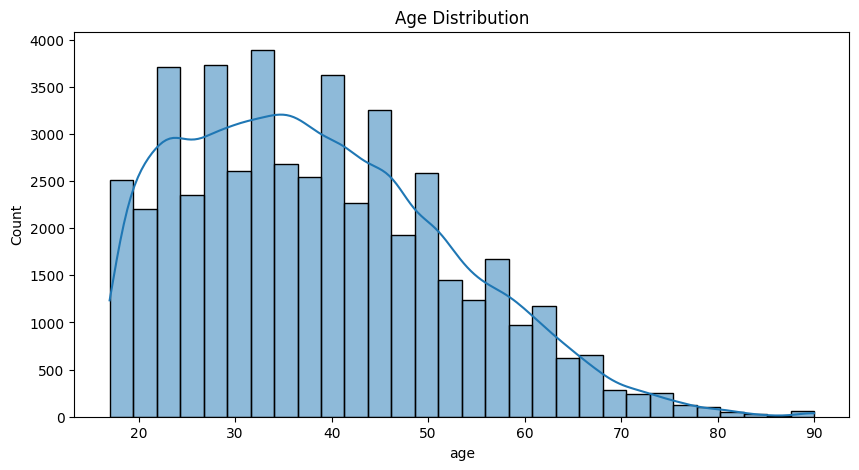

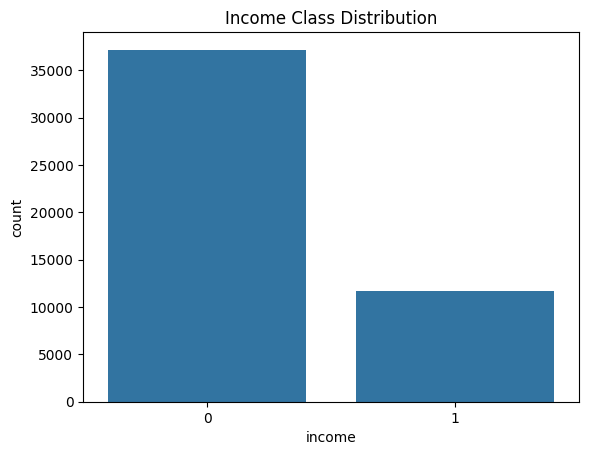

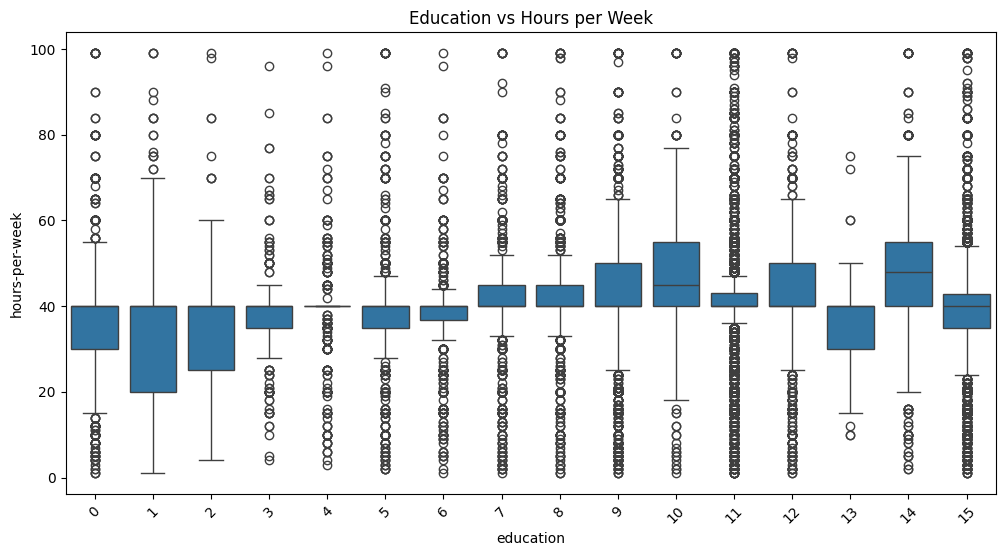

In [6]:
plt.figure(figsize=(10,5))
sns.histplot(df['age'], kde=True, bins=30)
plt.title("Age Distribution")
plt.show()

sns.countplot(x='income', data=df)
plt.title("Income Class Distribution")
plt.show()

plt.figure(figsize=(12,6))
sns.boxplot(x='education', y='hours-per-week', data=df)
plt.xticks(rotation=45)
plt.title("Education vs Hours per Week")
plt.show()


## Correlation Heatmap
Check the strength of linear relationships among numerical features.

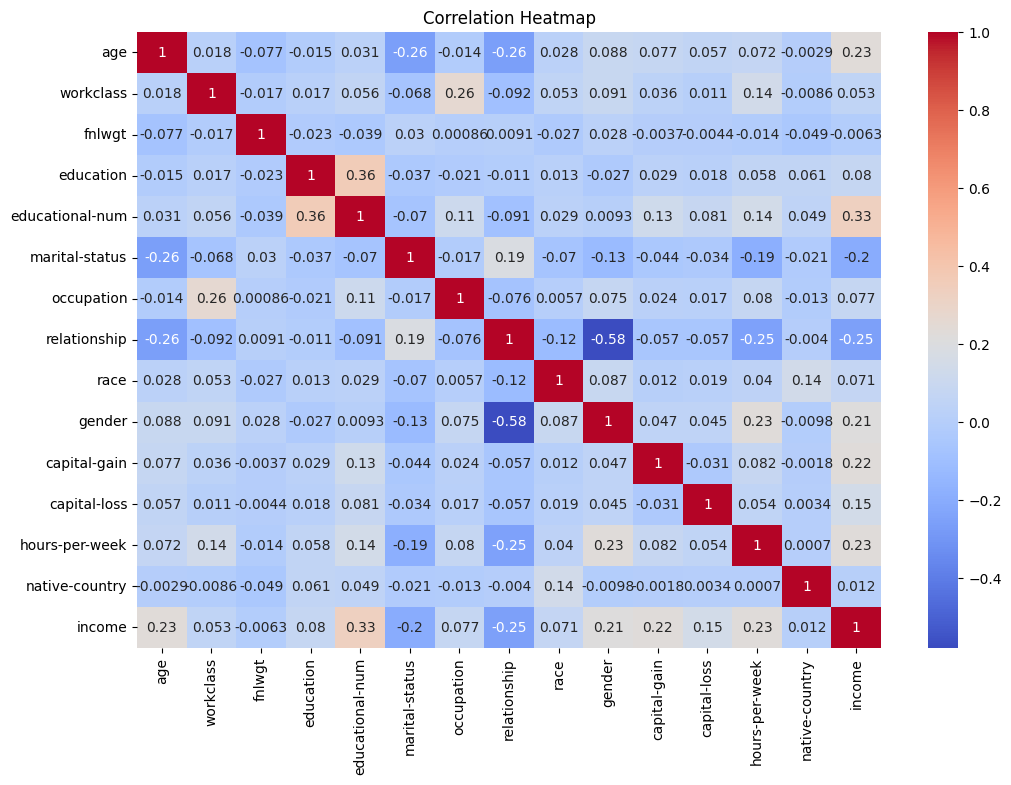

In [7]:
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()


## Define Features and Target
Separate the dataset into independent features (X) and dependent target variable (y).

In [8]:
X = df.drop("income", axis=1)
y = df["income"]


## Train-Test Split
Split the dataset into training and testing sets (75% - 25%).

In [9]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)


## Model Training & Hyperparameter Tuning
Use GridSearchCV to find the best parameters for each model. Evaluate performance using Mean Squared Error.

In [10]:
model_params = {
    'Linear_Regression': {
        'model': LinearRegression(),
        'params': {}
    },
    'Decision_Tree': {
        'model': DecisionTreeRegressor(),
        'params': {
            'max_depth': [4, 6, 8, 10],
            'random_state': [0, 42],
            'min_samples_split': [2, 5, 10]
        }
    },
    'Random_Forest': {
        'model': RandomForestRegressor(),
        'params': {
            'n_estimators': [10, 50, 100]
        }
    }
}

results = []

for model_name, config in model_params.items():
    clf = GridSearchCV(config['model'], config['params'], cv=5, scoring='neg_mean_squared_error')
    clf.fit(x_train, y_train)

    results.append({
        'Model': model_name,
        'Best Params': clf.best_params_,
        'MSE(-ve)': clf.best_score_
    })

pd.DataFrame(results)


,Model,Best Params,MSE(-ve)
0,Linear_Regression,{},-0.135724
1,Decision_Tree,"{'max_depth': 8, 'min_samples_split': 10, 'ran...",-0.101452
2,Random_Forest,{'n_estimators': 100},-0.103242


## Final Model Evaluation - Random Forest

In [11]:
rfr = RandomForestRegressor(n_estimators=100)
rfr.fit(x_train, y_train)
y_pred_rfr = rfr.predict(x_test)
rmse = np.sqrt(mean_squared_error(y_test, y_pred_rfr))

print("R² Score:", rfr.score(x_test, y_test))
print("MAE:", mean_absolute_error(y_test, y_pred_rfr))
print("MSE:", mean_squared_error(y_test, y_pred_rfr))
print("RMSE:", rmse)



R² Score: 0.4535326220176451
MAE: 0.1870899462233505
MSE: 0.09794209395899872
RMSE: 0.3129570161523763


##  Feature Importance
Visualize the top features influencing the income prediction.

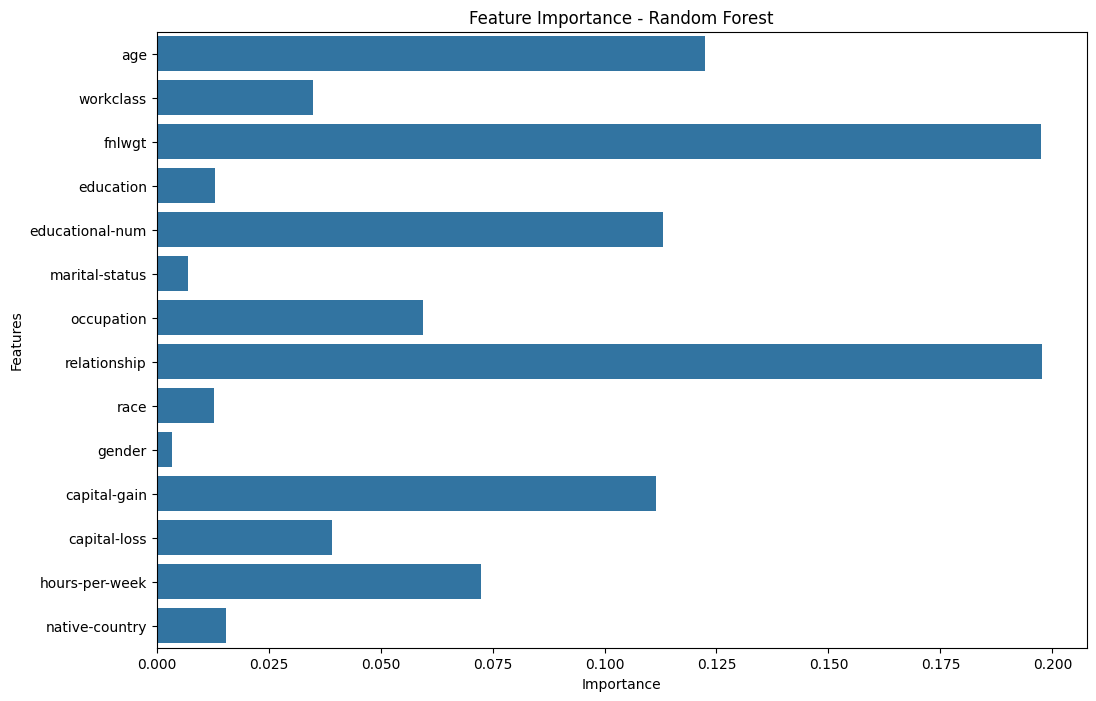

In [12]:
feature_importances = rfr.feature_importances_
feature_names = X.columns

plt.figure(figsize=(12, 8))
sns.barplot(x=feature_importances, y=feature_names)
plt.xlabel("Importance")
plt.ylabel("Features")
plt.title("Feature Importance - Random Forest")
plt.show()


## Conclusion
- The Random Forest model achieved the highest accuracy and lowest error.
- Features like `education-num`, `capital-gain`, and `hours-per-week` had the most influence.
- The model is effective in classifying income levels and can be used for HR analytics, government surveys, or economic modeling.

## StreamLit

In [13]:
import pickle

with open("model.pkl", "wb") as f:
    pickle.dump(rfr, f)


In [14]:
from google.colab import files
files.download("model.pkl")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>